In [1]:
df1 = read.csv('../Dataset/Q2_Diff_Stationary_Clean_data.csv')

In [2]:
head(df1)

DATE,sum_x,sum_y
2015-01-04,593832.2,0.00
2015-01-05,-244493.2,3788.44
2015-01-06,-1757528.2,0.00
2015-01-07,-862739.0,0.00
2015-01-08,1242918.0,8632.31
2015-01-09,345627.7,0.00


In [3]:
library(forecast)

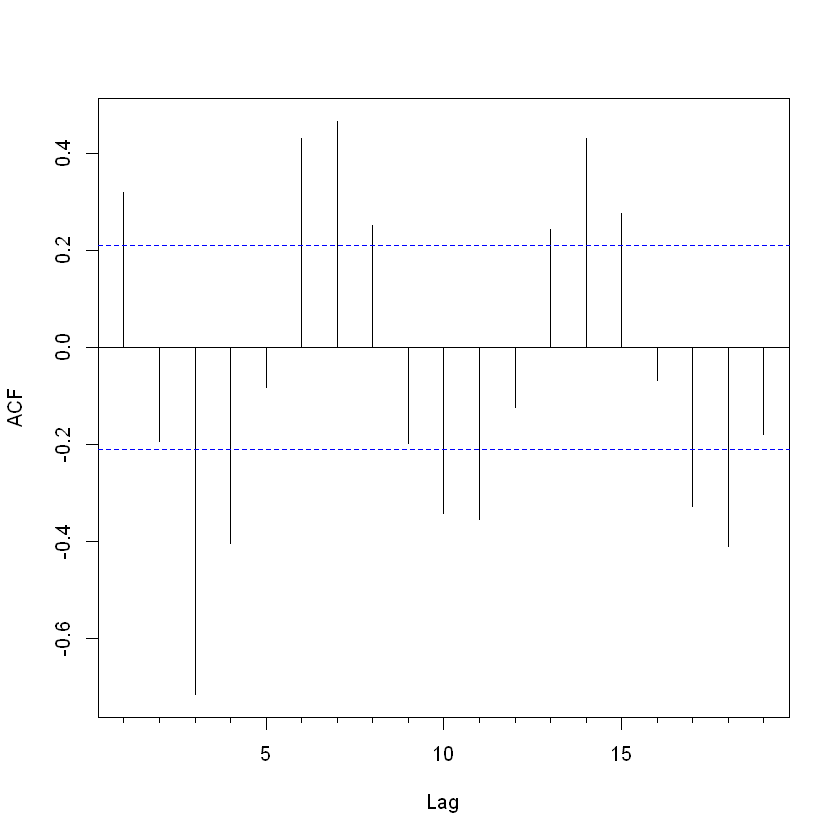

In [4]:
# Ploting ACF chart
Acf(df1$sum_x, main="")

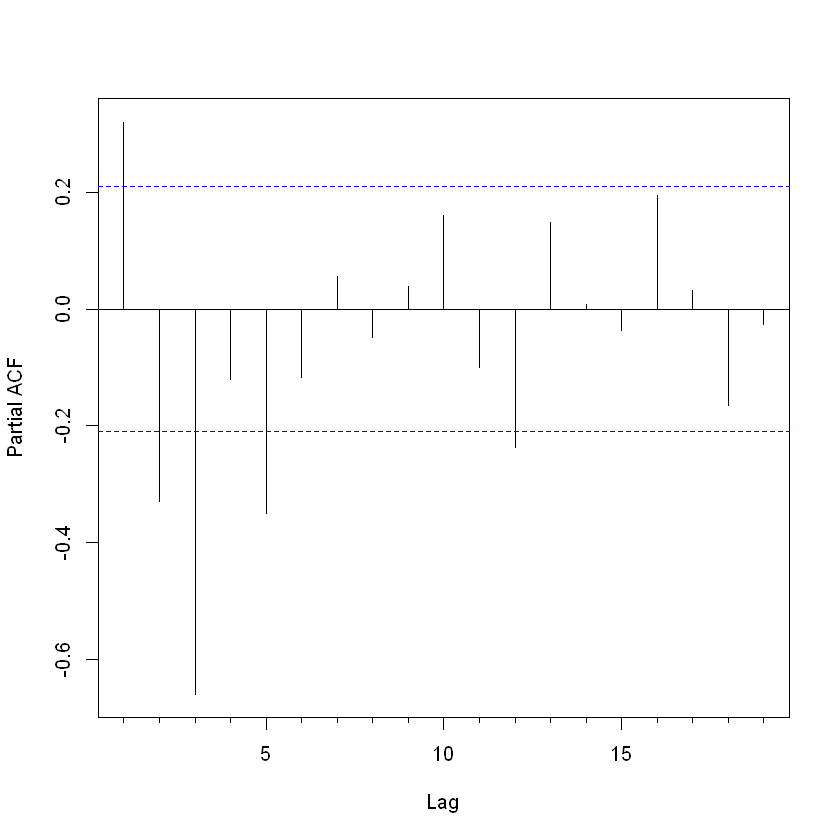

In [5]:
# Ploting PACF chart
Pacf(df1$sum_x, main='')

In [6]:
# Using Auto-arima to find optimal value of parameters
fit1<-auto.arima(df1$sum_x, xreg=df1$sum_y)
summary(fit1)

Series: df1$sum_x 
Regression with ARIMA(3,0,1) errors 

Coefficients:
         ar1      ar2      ar3      ma1   intercept  df1$sum_y
      0.4869  -0.1629  -0.5792  -0.4583  -134699.83    77.0332
s.e.  0.1113   0.1077   0.0976   0.1313    55905.09    23.8206

sigma^2 estimated as 6.136e+11:  log likelihood=-1302.39
AIC=2618.78   AICc=2620.19   BIC=2636.04

Training set error measures:
                  ME     RMSE      MAE      MPE    MAPE     MASE       ACF1
Training set -5458.3 755845.8 571961.1 35.76305 117.434 0.481775 0.01781379


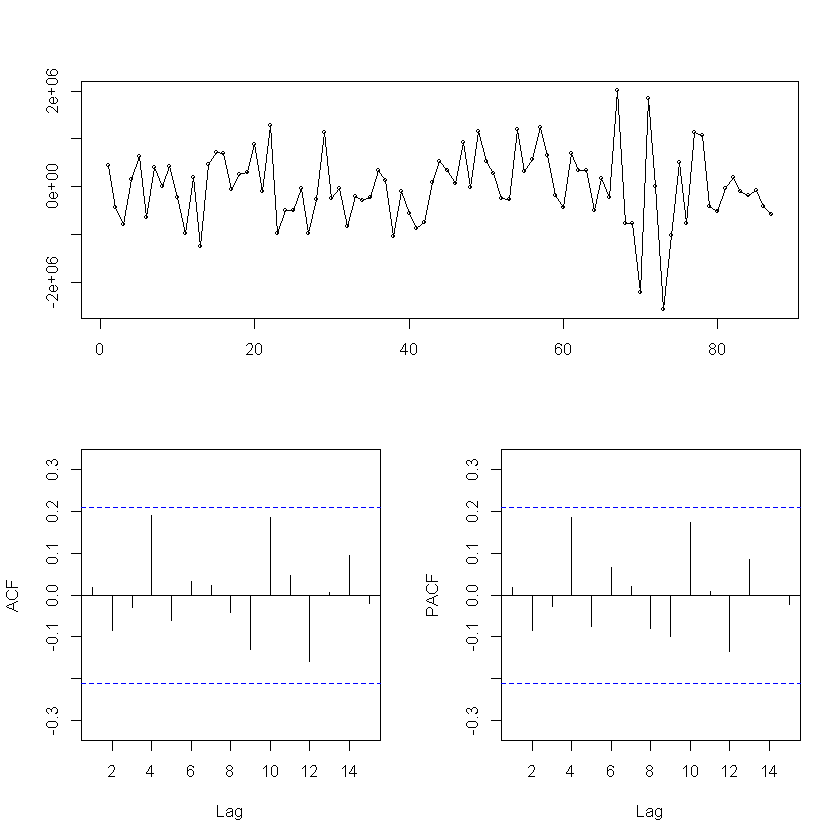

In [7]:
# Residuals need to be iid with mean 0
tsdisplay(residuals(fit1), lag.max=15, main='')

In [8]:
# Box test to verify the residuals are white noise (p-value > 0.05)
Box.test(residuals(fit1),lag=15, type="Ljung", fitdf=4)


	Box-Ljung test

data:  residuals(fit1)
X-squared = 13.727, df = 11, p-value = 0.2485


In [9]:
fit2<-arima(df1$sum_x, order=c(4,0,3), xreg=df1$sum_y)
summary(fit2)


Call:
arima(x = df1$sum_x, order = c(4, 0, 3), xreg = df1$sum_y)

Coefficients:
         ar1     ar2      ar3     ar4      ma1      ma2     ma3   intercept
      0.5595  0.0207  -0.8177  0.1982  -0.5063  -0.2351  0.2941  -139305.36
s.e.  0.3405  0.1789   0.1197  0.2427   0.3252   0.1990  0.1596    63268.39
      df1$sum_y
        78.5844
s.e.    25.8982

sigma^2 estimated as 5.463e+11:  log likelihood = -1300.53,  aic = 2621.06

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set -5582.393 739101.2 562302.6 45.01444 115.7794 0.4736395
                    ACF1
Training set 0.004231318


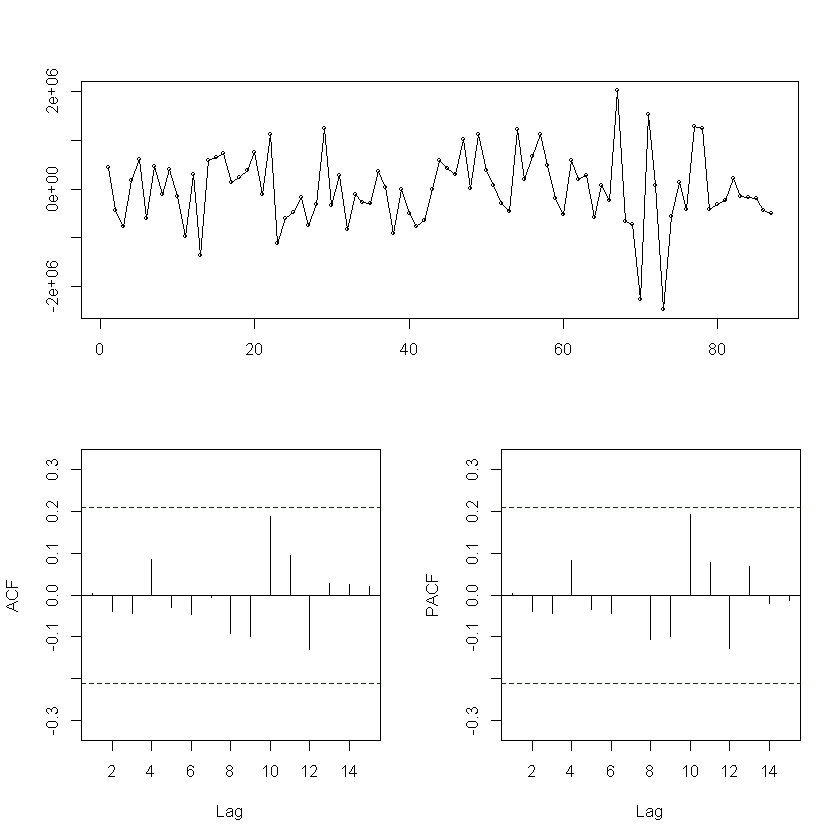

In [10]:
tsdisplay(residuals(fit2), lag.max=15, main='')

In [11]:
Box.test(residuals(fit2),lag = 15, type="Ljung", fitdf=7)


	Box-Ljung test

data:  residuals(fit2)
X-squared = 9.4959, df = 8, p-value = 0.3022
